# EXCLUSIVELY CLEANING FOR CSV DROP #

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../datasets/train.csv')

In [7]:
# Convert column names to lowercase
df.columns = map(str.lower,df.columns)
# Replace ' ' with '_' in column names
df.columns = df.columns.str.replace(' ','_')
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
#getting an idea of the size/shape of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [10]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
#looking for null values
null = df.isnull().sum().sort_values(ascending=False).head()
null
#and finding them

pool_qc         2042
misc_feature    1986
alley           1911
fence           1651
fireplace_qu    1000
dtype: int64

In [12]:
#curious about null values here
df['pool_qc'].describe()

count      9
unique     4
top       Gd
freq       4
Name: pool_qc, dtype: object

In [13]:
df['pool_qc'].sort_values(ascending=False)

1635     TA
1875     TA
657      Gd
761      Gd
960      Gd
       ... 
2046    NaN
2047    NaN
2048    NaN
2049    NaN
2050    NaN
Name: pool_qc, Length: 2051, dtype: object

In [14]:
df.value_counts(df['pool_qc'])

pool_qc
Gd    4
Fa    2
TA    2
Ex    1
dtype: int64

In [15]:
#changed the Nan in pool_qc to NA per the data dictionary
df['pool_qc'] = df['pool_qc'].fillna('NA')
df.value_counts(df['pool_qc'])

pool_qc
NA    2042
Gd       4
Fa       2
TA       2
Ex       1
dtype: int64

In [16]:
#replaced 14 of 26 features with NaN to NA as in data dictionary

df = df.fillna({'pool_qc': 'NA',
           'misc_feature': 'NA',
           'alley': 'NA',
           'fence': 'NA',
           'fireplace_qu': 'NA',
           'garage_finish': 'NA',
           'garage_qual': 'NA',
           'garage_cond': 'NA',
           'garage_type': 'NA',
           'bsmt_exposure': 'NA',
           'bsmtfin_type_2': 'NA',
           'bsmtfin_type_1': 'NA',
           'bsmt_cond': 'NA',
           'bsmt_qual': 'NA' 
})


In [17]:
df.isnull().sum().sort_values(ascending=False).head(12)

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_full_bath      2
bsmt_half_bath      2
garage_cars         1
total_bsmt_sf       1
bsmt_unf_sf         1
bsmtfin_sf_2        1
bsmtfin_sf_1        1
garage_area         1
dtype: int64

In [18]:
#lot_frontage has many empty cells, what type is it? looked at data dictionary for more info
df['lot_frontage'].dtypes

dtype('float64')

In [19]:
#replace null with 0 in lot_frontage
df['lot_frontage'] = df['lot_frontage'].fillna('0')
#check to make sure it's gone
df.isnull().sum().sort_values(ascending=False).head(12)

garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_full_bath      2
bsmt_half_bath      2
garage_cars         1
total_bsmt_sf       1
bsmt_unf_sf         1
bsmtfin_sf_2        1
bsmtfin_sf_1        1
garage_area         1
kitchen_qual        0
dtype: int64

In [20]:
#hig corr categories I want to use in model, replaceing Na
df['garage_area'] = df['garage_area'].fillna(0)
df['total_bsmt_sf'] = df['total_bsmt_sf'].fillna(0)
df['garage_cars'] = df['garage_cars'].fillna(0)

In [21]:
#is there a property where garage_yr and garage_type are both null?
df[(df['garage_yr_blt'] == 'NaN') & (df['garage_type'] == 'NA')]
#nope

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     2051 non-null   object 
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [23]:
# run correlation to sales
df.corr()['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.649897
garage_cars        0.647781
total_bsmt_sf      0.629303
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
garage_yr_blt      0.533922
mas_vnr_area       0.512230
totrms_abvgrd      0.504014
fireplaces         0.471093
bsmtfin_sf_1       0.423519
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283662
half_bath          0.283001
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190210
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016255
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045328
id                -0.051398
ms_subclass       -0.087335
overall_cond      -0.097019
kitchen_abvgr     -0

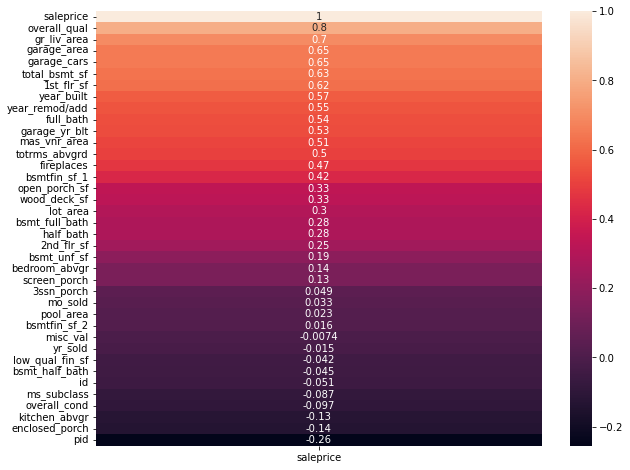

In [24]:
#CODE CREDIT: heatmap from Breakfast Hour on 02/08 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True);

In [25]:
#(df.corr()['saleprice'].sort_values(ascending=False))

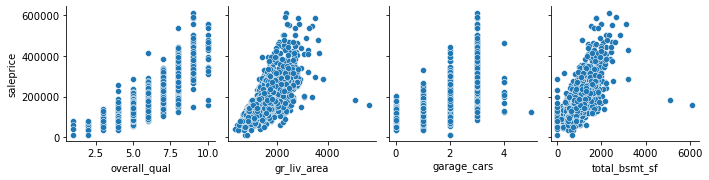

In [26]:
#grab pairplot to compare top few correlations
sns.pairplot(df, x_vars=['overall_qual', 'gr_liv_area', 'garage_cars', 'total_bsmt_sf'], y_vars=['saleprice']);

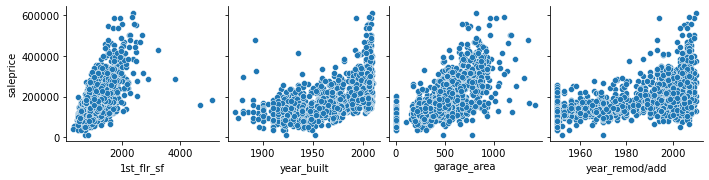

In [27]:
sns.pairplot(df, x_vars=['1st_flr_sf', 'year_built', 'garage_area', 'year_remod/add'], y_vars=['saleprice']);

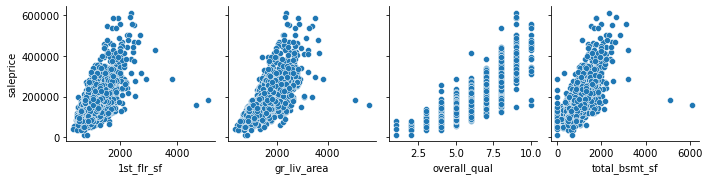

In [28]:
#picked out top four?
sns.pairplot(df, x_vars=['1st_flr_sf', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf'], y_vars=['saleprice']);

In [29]:
#investigate outliers of > 4000
df.loc[df['1st_flr_sf'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [30]:
df.loc[df['gr_liv_area'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [31]:
df.loc[df['total_bsmt_sf'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NA,IR3,Bnk,...,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [32]:
#dropped rows 960 + 1885 as outliers
dropped_df = df.drop(index=[960, 1885])
#check to see if they're gone:
dropped_df.loc[dropped_df['total_bsmt_sf'] > 4000]
#and they are

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


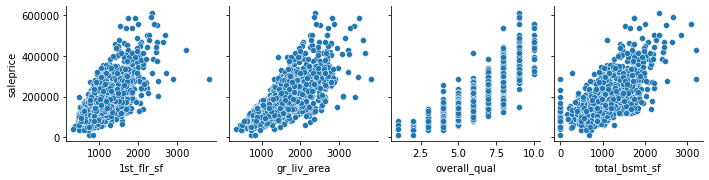

In [33]:
#check correlation without those two observations
sns.pairplot(dropped_df, x_vars=['1st_flr_sf', 'gr_liv_area', 'overall_qual', 'total_bsmt_sf'], y_vars=['saleprice']);

In [34]:
#compare dropped_df to df, to see if significant improvement
dropped_df.corr()['saleprice'].sort_values(ascending=False).head(7)

saleprice        1.000000
overall_qual     0.803462
gr_liv_area      0.719463
total_bsmt_sf    0.665116
garage_area      0.655097
1st_flr_sf       0.648252
garage_cars      0.648227
Name: saleprice, dtype: float64

In [35]:
df.corr()['saleprice'].sort_values(ascending=False).head(12)
# it is improved without those events, but I don't know if this is significant 

saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.649897
garage_cars       0.647781
total_bsmt_sf     0.629303
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
garage_yr_blt     0.533922
mas_vnr_area      0.512230
Name: saleprice, dtype: float64

In [36]:
# ready to set up model in other notebooks:
X = df[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf']] 
y = df['saleprice']

In [37]:
#save cleaned and dropped for modeling
#dropped_df.to_csv('cleaned_and_dropped.csv')